# X-LoVoCCS Metallicity Relations

## Import Statements

In [1]:
from xga.relations.fit import scaling_relation_lira
from xga import DEFAULT_COSMO

from astropy.units import Quantity, def_unit
import pandas as pd

/Users/dt237/code/XGA/xga/utils.py:39: DeprecationWarning: The XGA 'find_all_wcs' function should be imported from imagetools.misc, in the future it will be removed from utils.
  warn(message, DeprecationWarning)
/Users/dt237/code/XGA/xga/utils.py:632: UserWarning: No eSASS installation detected on system, as such all functions in xga.generate.esass will not work.
  warn("No eSASS installation detected on system, as such all functions in xga.generate.esass will not work.")
/opt/anaconda3/envs/xga_dev/lib/python3.8/site-packages/PyAbel-0.8.4-py3.8.egg/abel/tools/circularize.py:4: DeprecationWarning: Please use `map_coordinates` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import map_coordinates
/opt/anaconda3/envs/xga_dev/lib/python3.8/site-packages/PyAbel-0.8.4-py3.8.egg/abel/tools/polar.py:10: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` 

## Loading Results

We load the results of the XGA-LTR run that allowed the metallicity to vary freely 

In [2]:
res500_metfree = pd.read_csv('../../outputs/results/ltr_r500_metfree_pipeline_results.csv')
res500_metfree.head(5)

,name,MCXC,LoVoCCSID,LoVoCCS_name,ra,dec,redshift,sub_samp,old_LoVoCCSID,r500,...,Tx500ce+,Lx500ce_0.5-2.0,Lx500ce_0.5-2.0-,Lx500ce_0.5-2.0+,Lx500ce_0.01-100.0,Lx500ce_0.01-100.0-,Lx500ce_0.01-100.0+,Zmet500ce,Zmet500ce-,Zmet500ce+
0,LoVoCCS-0,J1558.3+2713,0,LoVoCCS-0,239.585833,27.226944,0.0894,north,0,1241.126247,...,0.062129,3.859586e+44,2.108788e+43,1.512657e+43,1.443280e+45,7.869493e+43,8.390768e+43,0.209867,0.013384,0.013336
1,LoVoCCS-1,J1510.9+0543,1,LoVoCCS-1,227.729167,5.720000,0.0766,south,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LoVoCCS-2,J0258.9+1334,2,LoVoCCS-2,44.739583,13.579444,0.0739,south,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LoVoCCS-3,J1348.8+2635,3,LoVoCCS-3,207.220833,26.595556,0.0622,north,3,935.622882,...,0.048816,1.894150e+44,6.939636e+41,4.869208e+41,5.772712e+44,3.715156e+42,4.449161e+42,0.128075,0.012191,0.012298
4,LoVoCCS-4,J0041.8-0918,4,LoVoCCS-4,10.458750,-9.301944,0.0555,south,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Setting up for scaling relation fits

In [3]:
sol_met = def_unit('AbundSun', format={'latex': r"Z_{\odot}"})

In [4]:
met_norm = Quantity(1, sol_met)
tx_norm = Quantity(4, 'keV')
lx52_norm = Quantity(1e+44, 'erg/s')

In [5]:
names = res500_metfree['LoVoCCS_name'].values
zs = res500_metfree['redshift'].values

In [6]:
DEFAULT_COSMO

LambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)

In [7]:
inv_e = DEFAULT_COSMO.inv_efunc(zs)
inv_e

array([0.95876463, 0.96477483, 0.96603877, 0.97149936, 0.97461373,
       0.97456732, 0.94690026, 0.95471062, 0.9559847 , 0.97303449,
       0.96106887, 0.9752169 , 0.98219513, 0.96543038, 0.96683387,
       0.96073995, 0.9734063 , 0.94761193, 0.96106887, 0.95518264,
       0.97808842, 0.95876463, 0.96275908, 0.95659773, 0.95471062,
       0.97298801, 0.96477483, 0.94988715, 0.97535604, 0.96102189,
       0.96678712, 0.95031338, 0.95541859, 0.94538098, 0.95579602,
       0.95277369, 0.96655331, 0.96073995, 0.96505583, 0.96158557,
       0.94504846, 0.94580842, 0.95819969, 0.98642039, 0.97841208,
       0.94452579, 0.9642595 , 0.95607903, 0.98518253, 0.9638377 ,
       0.97419594, 0.94680534, 0.95862342, 0.96308745, 0.95843511,
       0.95036073, 0.94519098, 0.96205511, 0.97910527, 0.95645628,
       0.97831962, 0.95508825, 0.95876463, 0.94599836, 0.95471062,
       0.94623575, 0.95069216, 0.94856034, 0.95984673, 0.94618827,
       0.96674036, 0.9798441 , 0.96069295, 0.95107083, 0.97396

## Fitting with LIRA

### $Z_{\rm{X},500}$-$T_{\rm{X,500}}$

In [8]:
met = Quantity(res500_metfree[['Zmet500', 'Zmet500-', 'Zmet500+']].values, sol_met)
tx = Quantity(res500_metfree[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

met_tx_r500 = scaling_relation_lira(met[:, 0], met[:, 1:], tx[:, 0], tx[:, 1:], met_norm, tx_norm, 
                                             y_name=r'$Z_{\rm{X,500}}$', x_name=r'$T_{\rm{X,500}}$', 
                                             dim_hubb_ind=None, point_names=names, third_dim_info=zs, 
                                             third_dim_name='Redshift')
met_tx_r500.author = "Turner et al."
met_tx_r500.model_colour = "tab:cyan"
met_tx_r500.name = r"X-LoVoCCS $R_{500}$"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 37 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))
R[write to console]: module mix loaded



  |**************************************************| 100%


In [23]:
met_tx_r500.point_names[21]

'LoVoCCS-40'

In [24]:
met_tx_r500.point_names[49]

'LoVoCCS-77'

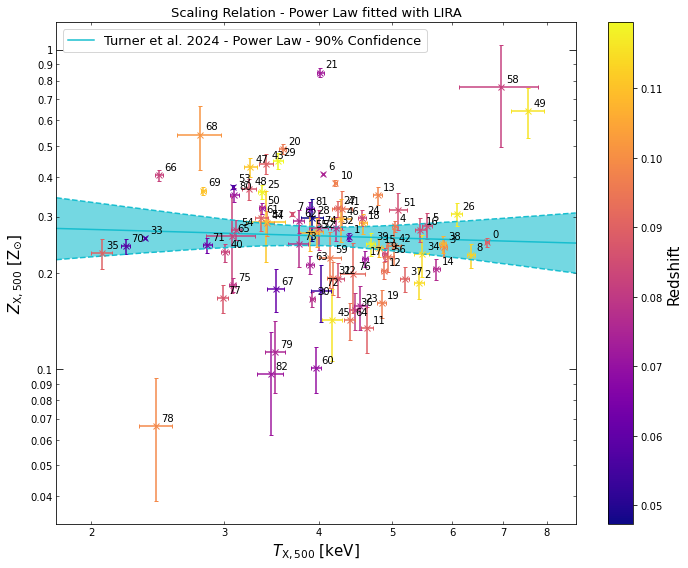

In [21]:
met_tx_r500.view(label_points=True)

Removed no burn in


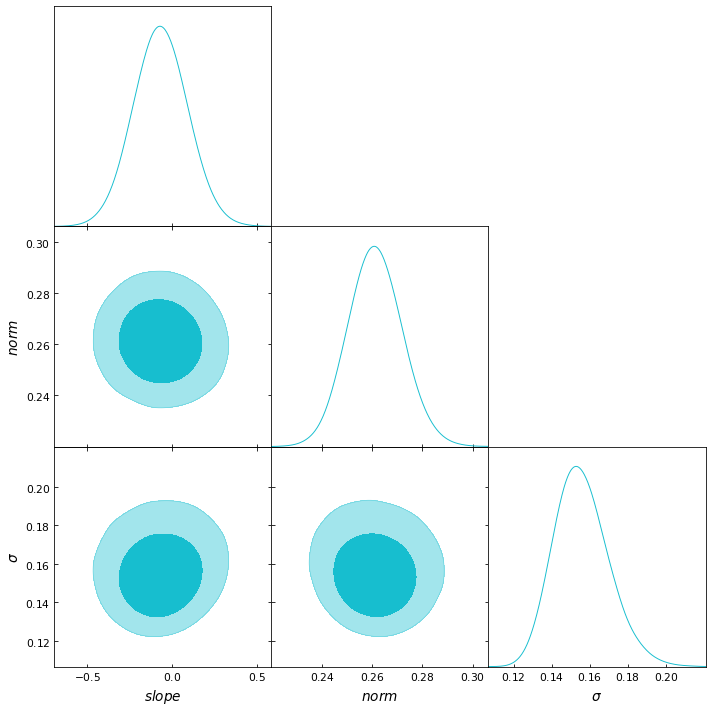

In [25]:
met_tx_r500.view_corner()

### $Z_{\rm{X},500ce}$-$T_{\rm{X,500ce}}$

In [10]:
met = Quantity(res500_metfree[['Zmet500ce', 'Zmet500ce-', 'Zmet500ce+']].values, sol_met)
tx = Quantity(res500_metfree[['Tx500ce', 'Tx500ce-', 'Tx500ce+']].values, 'keV')

met_tx_r500ce = scaling_relation_lira(met[:, 0], met[:, 1:], tx[:, 0], tx[:, 1:], met_norm, tx_norm, 
                                      y_name=r'$Z_{\rm{X,500ce}}$', x_name=r'$T_{\rm{X,500ce}}$', 
                                      dim_hubb_ind=None, point_names=names, third_dim_info=zs, 
                                      third_dim_name='Redshift')
met_tx_r500ce.author = "Turner et al."
met_tx_r500ce.model_colour = "firebrick"
met_tx_r500ce.name = r"X-LoVoCCS $R_{500ce}$"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 37 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


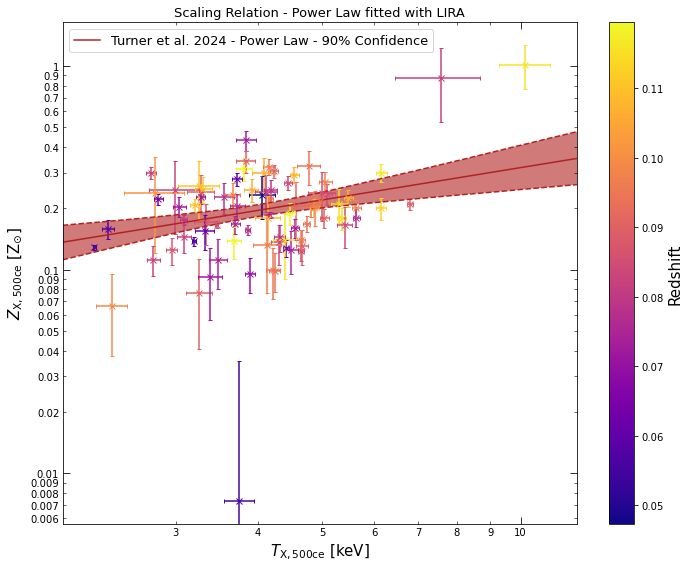

In [11]:
met_tx_r500ce.view()

Removed no burn in


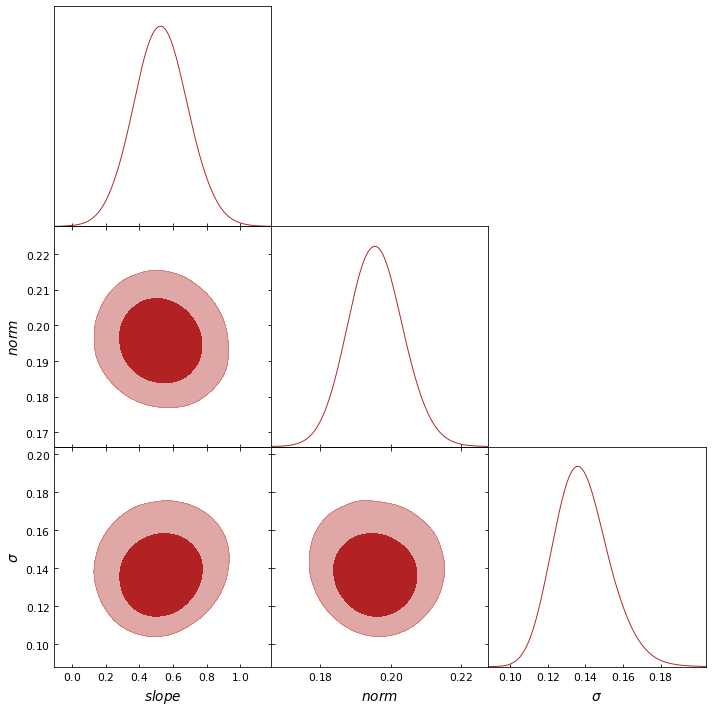

In [12]:
met_tx_r500ce.view_corner()

In [13]:
met = Quantity(res500_metfree[['Zmet500', 'Zmet500-', 'Zmet500+']].values, sol_met)
lx = Quantity(res500_metfree[['Lx500_0.5-2.0', 'Lx500_0.5-2.0-', 'Lx500_0.5-2.0+']].values, 'erg/s')

met_lx52_r500 = scaling_relation_lira(met[:, 0], met[:, 1:], lx[:, 0], lx[:, 1:], met_norm, lx52_norm, 
                                             y_name=r'$Z_{\rm{X,500}}$', x_name=r'$L^{52}_{\rm{X,500}}$', 
                                             dim_hubb_ind=None, point_names=names, third_dim_info=zs, 
                                             third_dim_name='Redshift')
met_lx52_r500.author = "Turner et al."
met_lx52_r500.model_colour = "seagreen"
met_lx52_r500.name = r"X-LoVoCCS $R_{500}$"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 37 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


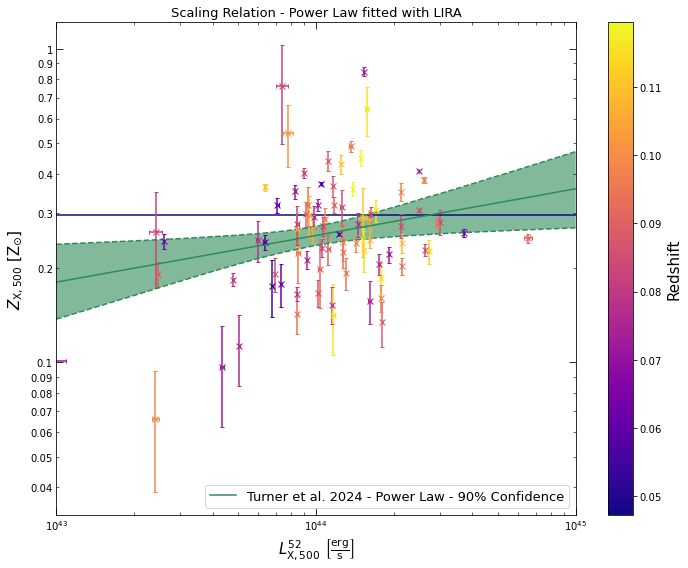

In [14]:
met_lx52_r500.view(x_lims=Quantity([1e+43, 1e+45], 'erg/s'))

In [15]:
met = Quantity(res500_metfree[['Zmet500ce', 'Zmet500ce-', 'Zmet500ce+']].values, sol_met)
lx = Quantity(res500_metfree[['Lx500ce_0.5-2.0', 'Lx500ce_0.5-2.0-', 'Lx500ce_0.5-2.0+']].values, 'erg/s')

met_lx52_r500ce = scaling_relation_lira(met[:, 0], met[:, 1:], lx[:, 0], lx[:, 1:], met_norm, lx52_norm, 
                                        y_name=r'$Z_{\rm{X,500ce}}$', x_name=r'$L^{52}_{\rm{X,500ce}}$', 
                                        dim_hubb_ind=None, point_names=names, third_dim_info=zs, 
                                        third_dim_name='Redshift')
met_lx52_r500ce.author = "Turner et al."
met_lx52_r500ce.model_colour = "indigo"
met_lx52_r500ce.name = r"X-LoVoCCS $R_{500ce}$"

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 37 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


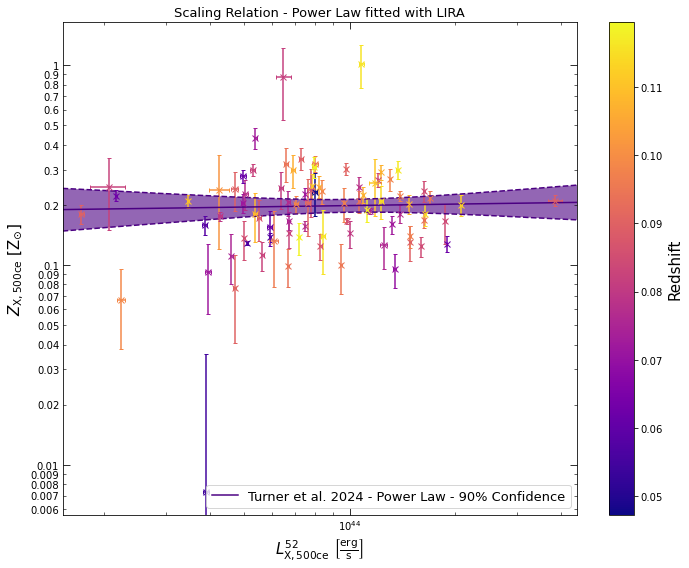

In [16]:
met_lx52_r500ce.view()

/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  return AggregateScalingRelation(to_combine)
/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  return AggregateScalingRelation(to_combine)


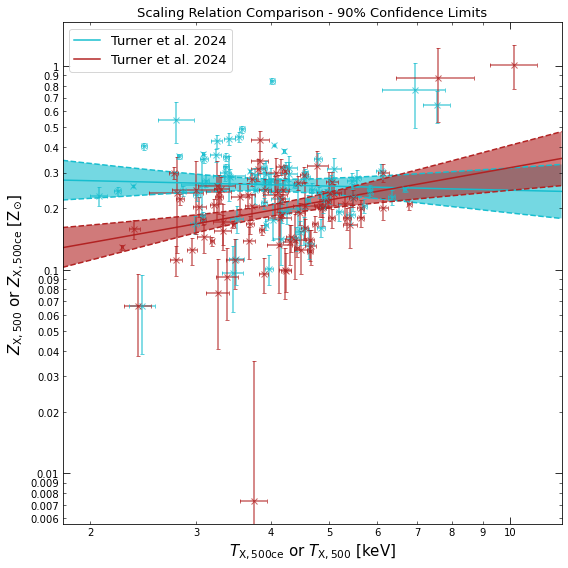

In [17]:
(met_tx_r500+met_tx_r500ce).view()

/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  return AggregateScalingRelation(to_combine)
/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  return AggregateScalingRelation(to_combine)


Removed no burn in
Removed no burn in


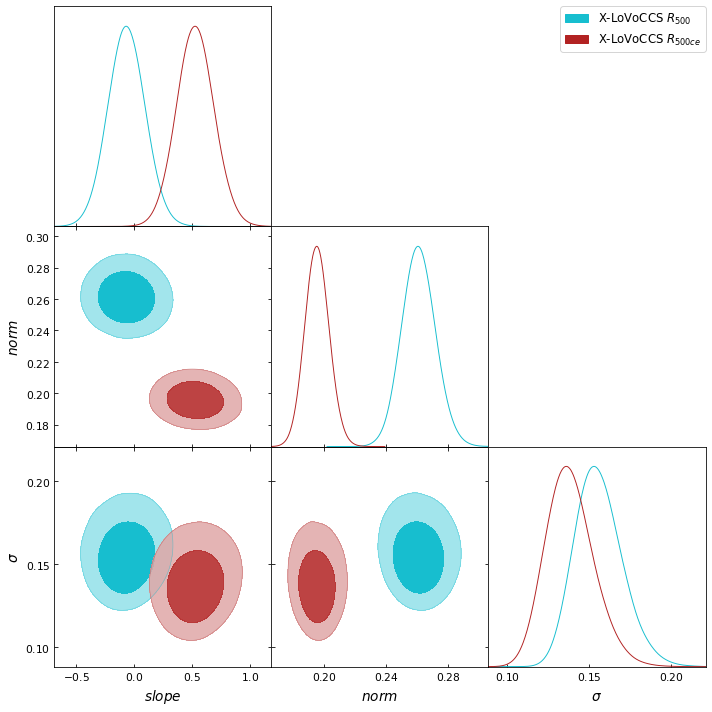

In [18]:
(met_tx_r500+met_tx_r500ce).view_corner()

/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  return AggregateScalingRelation(to_combine)
/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  return AggregateScalingRelation(to_combine)


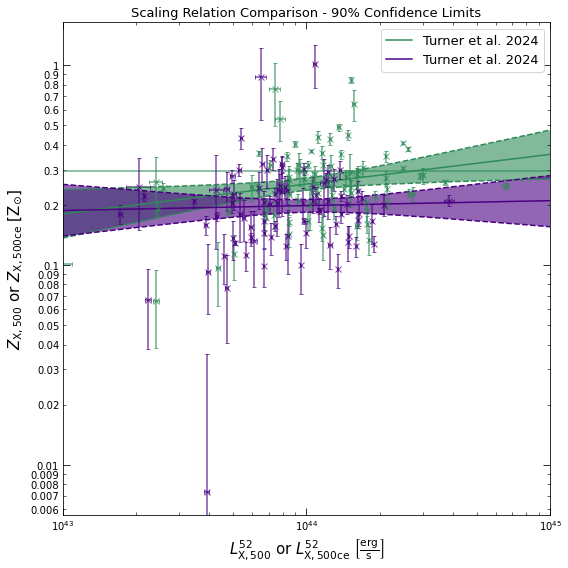

In [19]:
(met_lx52_r500+met_lx52_r500ce).view(x_lims=Quantity([1e+43, 1e+45], 'erg/s'))

/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  return AggregateScalingRelation(to_combine)
/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  return AggregateScalingRelation(to_combine)


Removed no burn in
Removed no burn in


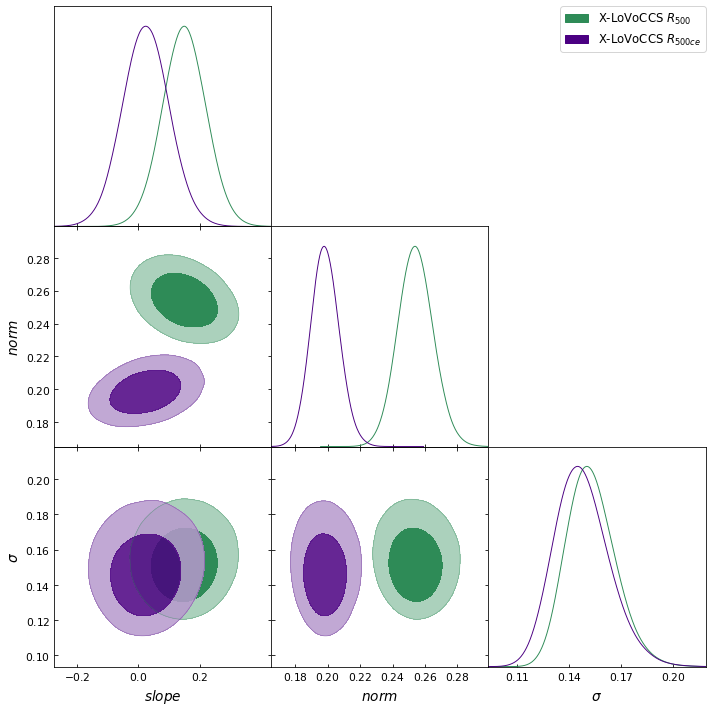

In [20]:
(met_lx52_r500+met_lx52_r500ce).view_corner()